Mean R2 score for ExtraTrees regressor: 0.81
Total fit time for ExtraTrees regressor: 1049.1574 seconds


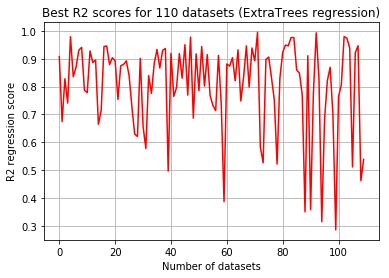

-------------x------------------x---------------x---------------
 
Mean R2 score for ElasticNet regressor: 0.48
Total fit time for ElasticNet regressor: 0.7972 seconds


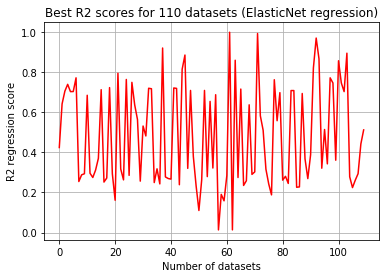

-------------x------------------x---------------x---------------
 
Mean R2 score for DecisionTree regressor: 0.67
Total fit time for DecisionTree regressor: 7.8074 seconds


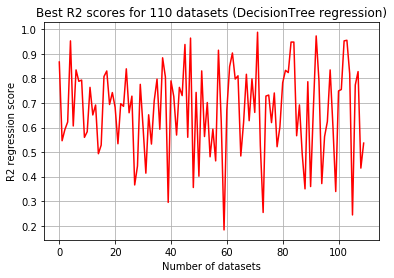

-------------x------------------x---------------x---------------
 
Mean R2 score for Adaboost regressor: 0.74
Total fit time for Adaboost regressor: 95.0473 seconds


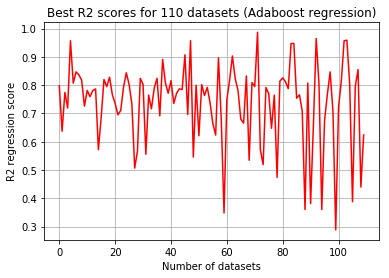

-------------x------------------x---------------x---------------
 
Mean R2 score for BayesianRidge regressor: 0.49
Total fit time for BayesianRidge regressor: 0.7890 seconds


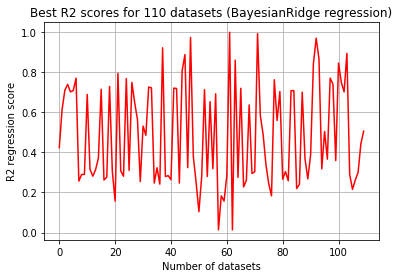

-------------x------------------x---------------x---------------
 
Mean R2 score for Huber regressor: 0.46
Total fit time for Huber regressor: 1.5927 seconds


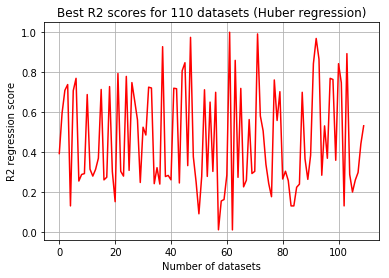

-------------x------------------x---------------x---------------
 
Mean R2 score for XGBoost regressor: 0.82
Total fit time for XGBoost regressor: 63.5144 seconds


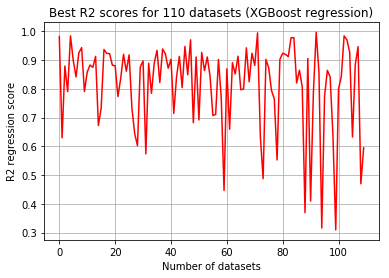

-------------x------------------x---------------x---------------
 
Mean R2 score for LinearRegression regressor: 0.48
Total fit time for LinearRegression regressor: 0.3049 seconds


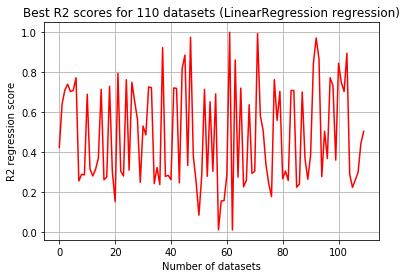

-------------x------------------x---------------x---------------
 
Mean R2 score for GradientBoosting regressor: 0.80
Total fit time for GradientBoosting regressor: 15.7265 seconds


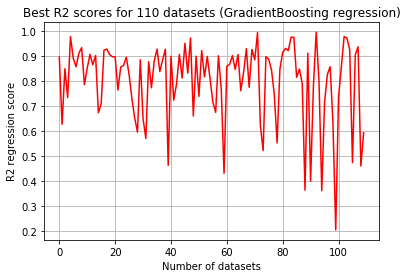

-------------x------------------x---------------x---------------
 
Mean R2 score for LinearSVR regressor: 0.48
Total fit time for LinearSVR regressor: 6.1705 seconds


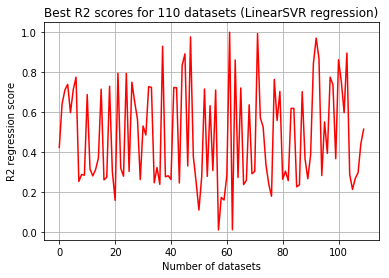

-------------x------------------x---------------x---------------
 
Mean R2 score for RandomForest regressor: 0.77
Total fit time for RandomForest regressor: 959.1198 seconds


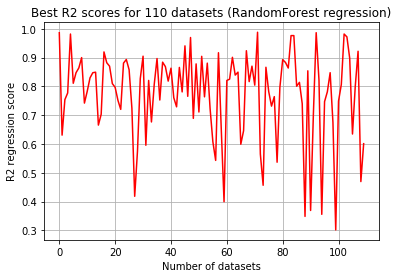

-------------x------------------x---------------x---------------
 
Mean R2 score for Lars regressor: 0.48
Total fit time for Lars regressor: 0.3873 seconds


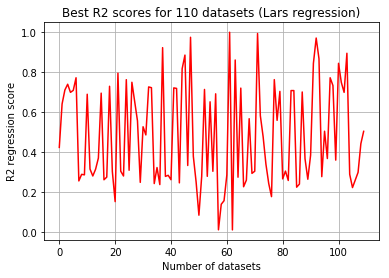

-------------x------------------x---------------x---------------
 
Mean R2 score for ExtraTree regressor: 0.67
Total fit time for ExtraTree regressor: 8.3667 seconds


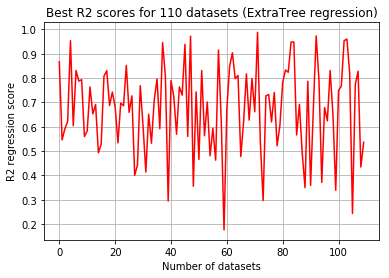

-------------x------------------x---------------x---------------
 
Mean R2 score for SGD regressor: 0.47
Total fit time for SGD regressor: 0.5005 seconds


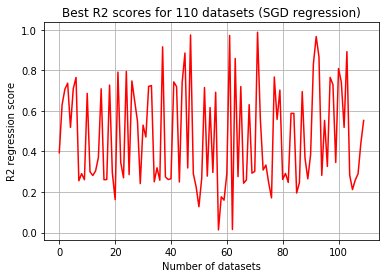

-------------x------------------x---------------x---------------
 
Mean R2 score for Bagging regressor: 0.77
Total fit time for Bagging regressor: 215.5295 seconds


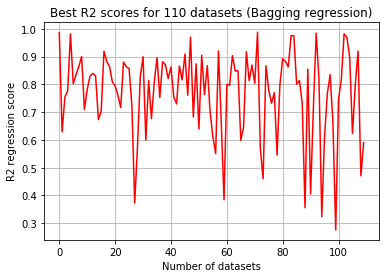

-------------x------------------x---------------x---------------
 
Mean R2 score for KNNeighbours regressor: 0.74
Total fit time for KNNeighbours regressor: 0.9602 seconds


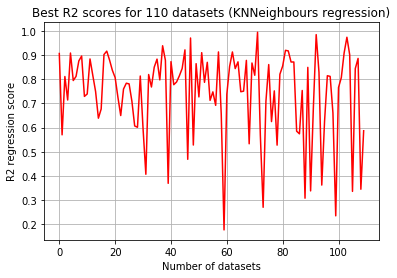

-------------x------------------x---------------x---------------
 


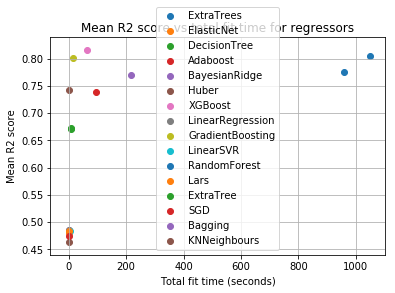

-------------x------------------x---------------


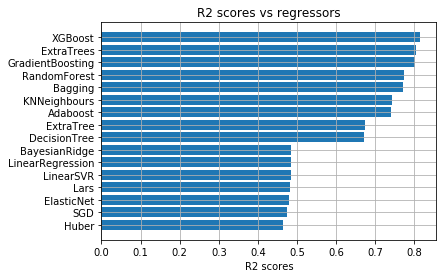

-------------x------------------x---------------


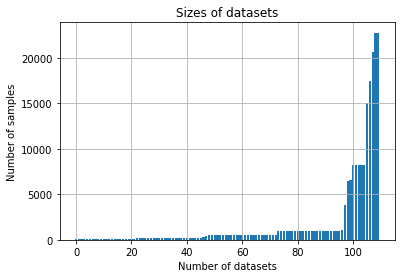

-------------x------------------x---------------
Total time taken: 27 seconds


In [20]:
import sys
import time
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
import warnings

warnings.filterwarnings('ignore')

start_time = time.time()
folder_name = "european_days/"
clf_names_dir = os.listdir(folder_name)

%matplotlib inline


def check_file(f_name):
    for clf in clf_names_dir:
        data_path = folder_name + clf
        files = [f for f in os.listdir(data_path)]
        if f_name not in files:
            return False
            break
    return True


clf_names = list()
clf_mean_r2 = list()
r2_dict = dict()
fit_time_dict = dict()
for clf in clf_names_dir:
    data_path = folder_name + clf
    files = [f for f in os.listdir(data_path)]
    r2_scores = list()
    fit_time = list()
    common_fileset = list()
    for f_name in files:
        if_file_present = check_file(f_name)
        if if_file_present is True:
            common_fileset.append(f_name)
            f_path = data_path + "/" + f_name
            df = pd.read_csv(f_path, sep="\t")
            rank_test_score = df[df["rank_test_score"] == 1]
            mean_test_score = rank_test_score["mean_test_score"]
            fit_time_sec = rank_test_score["mean_fit_time"].iloc[0] + rank_test_score["mean_score_time"].iloc[0]
            r2_scores.append(mean_test_score.iloc[0])
            fit_time.append(fit_time_sec)
    clf_names.append(clf)
    mean_r2 = np.mean(r2_scores)
    clf_mean_r2.append(mean_r2)
    r2_dict[clf] = mean_r2
    mean_fit_time = np.sum(fit_time)
    fit_time_dict[clf] = mean_fit_time
    print("Mean R2 score for %s regressor: %0.2f" % (clf, mean_r2))
    print("Total fit time for %s regressor: %0.4f seconds" % (clf, mean_fit_time))

    plt.figure()
    plt.plot(r2_scores, color='r')
    plt.grid(True)
    plt.xlabel("Number of datasets")
    plt.ylabel("R2 regression score")
    plt.title(('Best R2 scores for %d datasets (%s regression)' % (len(common_fileset), clf)))
    plt.show()
    print("-------------x------------------x---------------x---------------")
    print(" ")
    

fit_times_list = list()
r2_score_list = list()
names_clf = list()
ctr = 0
for item in r2_dict.items():
    names_clf.append(item[0])
    plt.scatter(fit_time_dict[item[0]], item[1])
    ctr += 1

plt.legend(tuple(names_clf))
plt.xlabel('Total fit time (seconds)')
plt.ylabel('Mean R2 score')
plt.title('Mean R2 score vs total fit time for regressors')
plt.grid(True)
plt.show()

print("-------------x------------------x---------------")

r2_dict = sorted(r2_dict.items(), key=lambda kv: kv[1])

cf = list()
r2 = list()

for item in r2_dict:
    cf.append(item[0])
    r2.append(item[1])

plt.figure()
y_pos = np.arange(len(cf))
plt.barh(y_pos, r2)
plt.yticks(y_pos, tuple(cf))
plt.xlabel('R2 scores')
plt.title('R2 scores vs regressors')
plt.grid(True)
plt.show()

print("-------------x------------------x---------------")

# fetch number of samples in each dataset

data_folder_name = "data_used/"

folder_dir = os.listdir(data_folder_name)

dataset_length = list()

for ds in folder_dir:
    if ds + ".tabular" in common_fileset:
        ds_path = data_folder_name + ds
        df = pd.read_csv(ds_path, sep="\t")
        dataset_length.append(len(df))

plt.figure()
y_pos = np.arange(len(dataset_length))
plt.bar(y_pos, sorted(dataset_length))
plt.xlabel('Number of datasets')
plt.ylabel('Number of samples')
plt.title('Sizes of datasets')
plt.grid(True)
plt.show()

print("-------------x------------------x---------------")

end_time = time.time()
print('Total time taken: %d seconds' % int(end_time - start_time))